In [62]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt

import wrangle as w

In [2]:
# acquire data
w.acquire_df()
df = w.prepare_df()

In [4]:
w.prepare_df()

,cohort_id,cohort_name,start_date,end_date,program_id,dates,time,endpoint,user_id,ip
0,8.0,Hampton,2015-09-22,2016-02-06,1.0,2018-01-26,09:55:03,/,1,97.105.19.61
1,8.0,Hampton,2015-09-22,2016-02-06,1.0,2018-01-26,09:56:02,java-ii,1,97.105.19.61
2,8.0,Hampton,2015-09-22,2016-02-06,1.0,2018-01-26,09:56:05,java-ii/object-oriented-programming,1,97.105.19.61
3,8.0,Hampton,2015-09-22,2016-02-06,1.0,2018-01-26,09:56:06,slides/object_oriented_programming,1,97.105.19.61
4,22.0,Teddy,2018-01-08,2018-05-17,2.0,2018-01-26,09:56:24,javascript-i/conditionals,2,97.105.19.61
...,...,...,...,...,...,...,...,...,...,...
900217,28.0,Staff,2014-02-04,2014-02-04,2.0,2021-04-21,16:41:51,jquery/personal-site,64,71.150.217.33
900218,28.0,Staff,2014-02-04,2014-02-04,2.0,2021-04-21,16:42:02,jquery/mapbox-api,64,71.150.217.33
900219,28.0,Staff,2014-02-04,2014-02-04,2.0,2021-04-21,16:42:09,jquery/ajax/weather-map,64,71.150.217.33
900220,28.0,Staff,2014-02-04,2014-02-04,2.0,2021-04-21,16:44:37,anomaly-detection/discrete-probabilistic-methods,744,24.160.137.86


# Explore

## Question 1: Which lesson appears to attract the most traffic consistently across cohorts (per program)?

In [24]:
# look at the lessons
df['endpoint'].value_counts().head(50)

/                                                                            50313
search/search_index.json                                                     19519
javascript-i                                                                 18983
toc                                                                          18297
java-iii                                                                     13733
html-css                                                                     13635
java-ii                                                                      12685
spring                                                                       12524
jquery                                                                       11525
mysql                                                                        11033
java-i                                                                       10865
javascript-ii                                                                10730
appe

In [10]:
# find out what programs exist
df.program_id.unique()

array([ 1.,  2., nan,  4.,  3.])

* Program 1.0 = WebDev 1.0
* Program 2.0 = WebDev 2.0
* Program 3.0 = Data Science (Didn't start until 2019)

In [30]:
# make dataframes for each program
df1 = df[df['program_id'] == 1.0]
df2 = df[df['program_id'] == 2.0]
df3 = df[df['program_id'] == 3.0]

In [31]:
# look at shape of WebDev 1.0
df1.shape

(30548, 10)

In [39]:
# look at lessons of WebDev 1.0
df1['endpoint'].value_counts().head(25)

/                                                                            1681
index.html                                                                   1011
javascript-i                                                                  736
html-css                                                                      542
spring                                                                        501
java-iii                                                                      479
java-ii                                                                       454
java-i                                                                        444
javascript-ii                                                                 429
appendix                                                                      409
jquery                                                                        344
mysql                                                                         284
content/html-css

In [35]:
# get count of hits of highest endpoint hits by cohort_id
df1.groupby('cohort_id')['endpoint'].apply(lambda x: x.str.contains('javascript-i/introduction/working-with-data-types-operators-and-variables').sum())

cohort_id
1.0     71
2.0      0
4.0      0
5.0      0
6.0      0
7.0     24
8.0      9
11.0     1
12.0     0
13.0     4
14.0    57
17.0    65
19.0     1
Name: endpoint, dtype: int64

In [40]:
# get count of hits of second highest endpoint hits by cohort_id
df1.groupby('cohort_id')['endpoint'].apply(lambda x: x.str.contains('java-iii/servlets').sum())

cohort_id
1.0     72
2.0      0
4.0      0
5.0      0
6.0      1
7.0      1
8.0     30
11.0     0
12.0     0
13.0     2
14.0    92
17.0    29
19.0     0
Name: endpoint, dtype: int64

In [41]:
# get count of hits of third highest endpoint hits by cohort_id
df1.groupby('cohort_id')['endpoint'].apply(lambda x: x.str.contains('javascript-i/javascript-with-html').sum())

cohort_id
1.0     76
2.0      0
4.0      0
5.0      0
6.0      1
7.0     14
8.0      9
11.0     2
12.0     0
13.0     5
14.0    54
17.0    63
19.0     1
Name: endpoint, dtype: int64

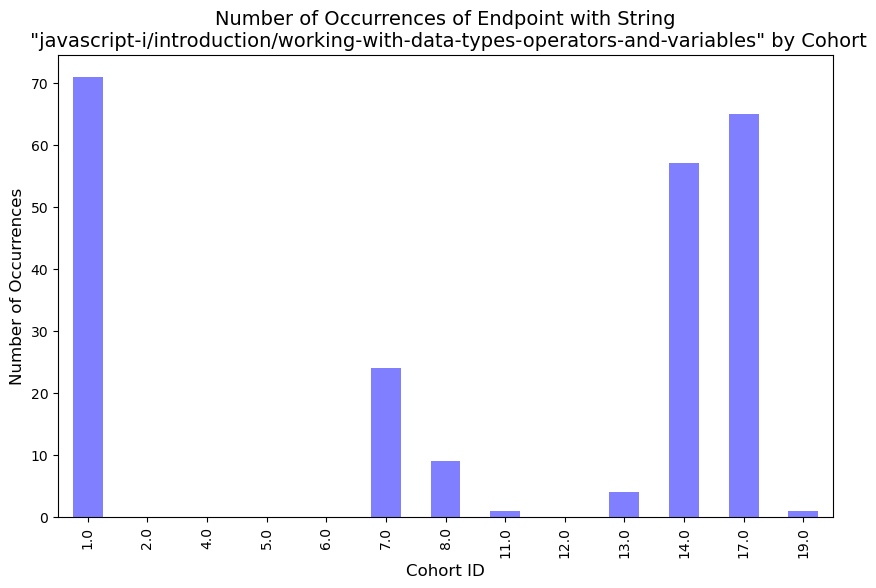

In [38]:
# selected highest hit endpoint to graph by cohort_id

# group by cohort_id and count the number of occurrences of the string in endpoint column
counts = df1.groupby('cohort_id')['endpoint'].apply(lambda x: x.str.contains('javascript-i/introduction/working-with-data-types-operators-and-variables').sum())

# plot the counts as a bar chart
ax = counts.plot(kind='bar', figsize=(10, 6), color='blue', alpha=0.5)

# set the chart title, x-axis label, and y-axis label
ax.set_title('Number of Occurrences of Endpoint with String\n "javascript-i/introduction/working-with-data-types-operators-and-variables" by Cohort', fontsize=14)
ax.set_xlabel('Cohort ID', fontsize=12)
ax.set_ylabel('Number of Occurrences', fontsize=12)

# show the plot
plt.show()

#### Takeaway
* WebDev 1.0's highest endpoint occurences is 'javascript i introduction', with 232 hits. The cohort's consistency never changed between lessons so we selected 'javascript i introduction' as most consistent.

In [42]:
# look at WebDev 2.0
df2.shape

(713365, 10)

In [43]:
# look at WebDev 2.0 endpoint hits
df2['endpoint'].value_counts().head(25)

/                                                                            35814
javascript-i                                                                 17457
toc                                                                          17428
search/search_index.json                                                     15212
java-iii                                                                     12683
html-css                                                                     12569
java-ii                                                                      11719
spring                                                                       11376
jquery                                                                       10693
mysql                                                                        10318
java-i                                                                       10016
javascript-ii                                                                 9861
appe

In [47]:
# get count of hits of highest endpoint hits by cohort_id
df2.groupby('cohort_id')['endpoint'].apply(lambda x: x.str.contains('javascript-i/introduction/working-with-data-types-operators-and-variables').sum())

cohort_id
15.0       0
16.0       1
18.0      11
21.0      36
22.0     176
23.0     276
24.0     330
25.0     283
26.0     241
27.0     173
28.0     288
29.0     356
31.0     294
32.0     327
33.0     423
51.0     292
52.0     319
53.0     295
56.0     270
57.0     257
58.0     382
61.0     173
62.0     362
132.0    237
134.0    315
135.0    505
138.0    329
139.0    146
Name: endpoint, dtype: int64

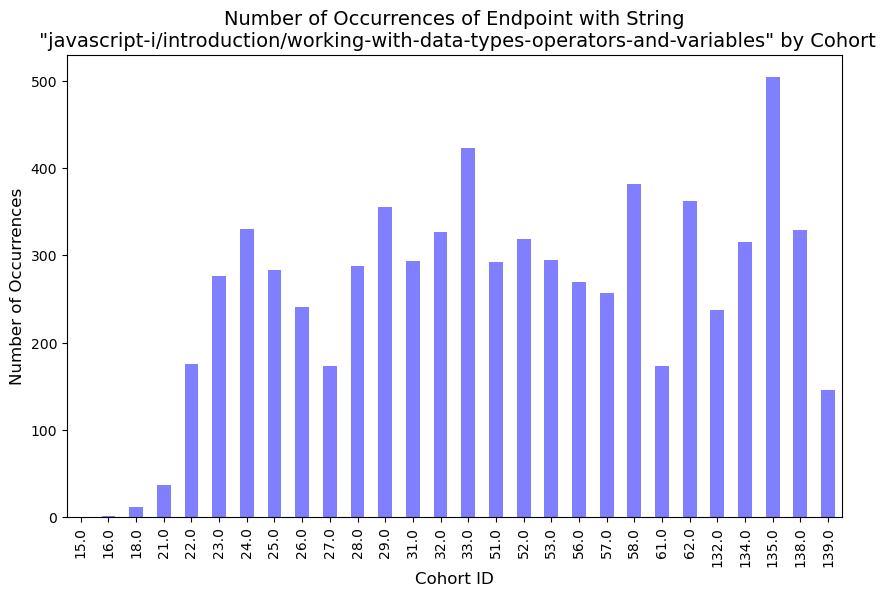

In [48]:
# group by cohort_id and count the number of occurrences of the string in endpoint column
counts = df2.groupby('cohort_id')['endpoint'].apply(lambda x: x.str.contains('javascript-i/introduction/working-with-data-types-operators-and-variables').sum())

# plot the counts as a bar chart
ax = counts.plot(kind='bar', figsize=(10, 6), color='blue', alpha=0.5)

# set the chart title, x-axis label, and y-axis label
ax.set_title('Number of Occurrences of Endpoint with String\n "javascript-i/introduction/working-with-data-types-operators-and-variables" by Cohort', fontsize=14)
ax.set_xlabel('Cohort ID', fontsize=12)
ax.set_ylabel('Number of Occurrences', fontsize=12)

# show the plot
plt.show()

#### Takeaway
* WebDev 2.0's highest endpoint occurences is 'javascript i introduction', with over 7,000 hits. It stayed consistent with over 140 hits across for 24 cohorts straight. 

In [49]:
# look at Data Science shape
df3.shape

(103411, 10)

In [44]:
# look at Data Science highest number of lesson hits
df3['endpoint'].value_counts().head(25)

/                                                    8358
search/search_index.json                             2203
classification/overview                              1785
1-fundamentals/modern-data-scientist.jpg             1655
1-fundamentals/AI-ML-DL-timeline.jpg                 1651
1-fundamentals/1.1-intro-to-data-science             1633
classification/scale_features_or_not.svg             1590
fundamentals/AI-ML-DL-timeline.jpg                   1443
fundamentals/modern-data-scientist.jpg               1438
sql/mysql-overview                                   1424
fundamentals/intro-to-data-science                   1413
6-regression/1-overview                              1124
anomaly-detection/AnomalyDetectionCartoon.jpeg        829
anomaly-detection/overview                            804
10-anomaly-detection/AnomalyDetectionCartoon.jpeg     754
10-anomaly-detection/1-overview                       751
3-sql/1-mysql-overview                                707
1-fundamentals

In [50]:
# get count of hits of highest endpoint hits by cohort_id
df3.groupby('cohort_id')['endpoint'].apply(lambda x: x.str.contains('classification/overview').sum())

cohort_id
34.0       35
55.0      136
59.0     1109
133.0     445
137.0      60
Name: endpoint, dtype: int64

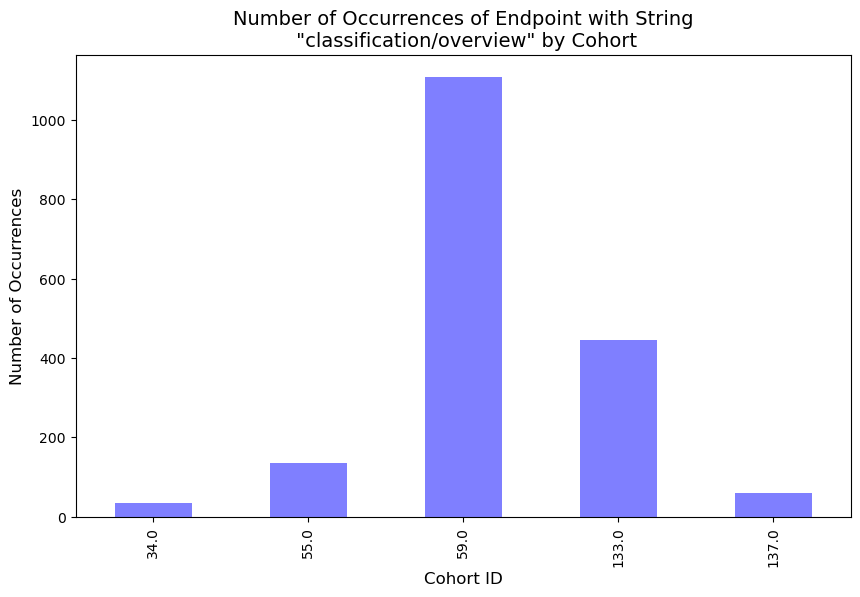

In [52]:
# group by cohort_id and count the number of occurrences of the string in endpoint column
counts = df3.groupby('cohort_id')['endpoint'].apply(lambda x: x.str.contains('classification/overview').sum())

# plot the counts as a bar chart
ax = counts.plot(kind='bar', figsize=(10, 6), color='blue', alpha=0.5)

# set the chart title, x-axis label, and y-axis label
ax.set_title('Number of Occurrences of Endpoint with String\n "classification/overview" by Cohort', fontsize=14)
ax.set_xlabel('Cohort ID', fontsize=12)
ax.set_ylabel('Number of Occurrences', fontsize=12)

# show the plot
plt.show()

In [53]:
# get count of hits of second highest endpoint hits by cohort_id
df3.groupby('cohort_id')['endpoint'].apply(lambda x: x.str.contains('1-fundamentals/1.1-intro-to-data-science').sum())

cohort_id
34.0     640
55.0     461
59.0     460
133.0      8
137.0     64
Name: endpoint, dtype: int64

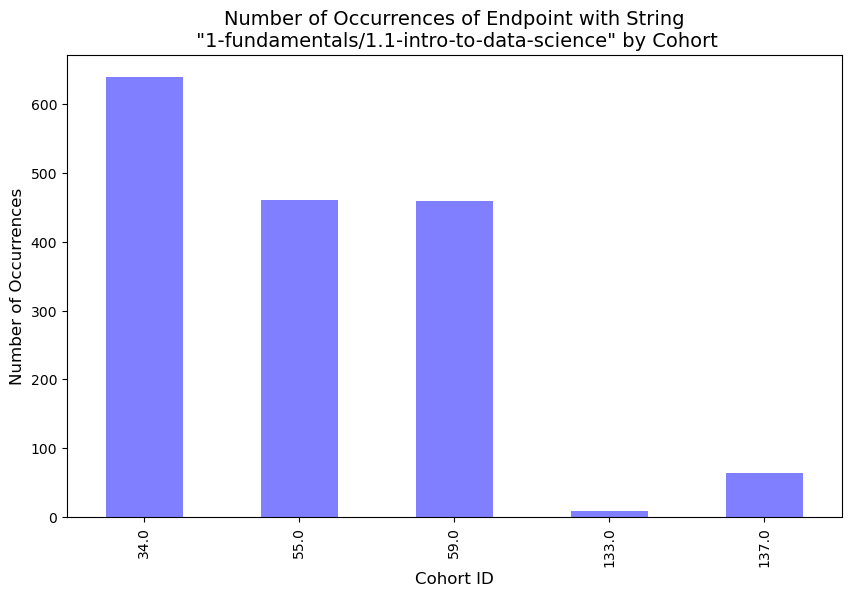

In [56]:
# group by cohort_id and count the number of occurrences of the string in endpoint column
counts = df3.groupby('cohort_id')['endpoint'].apply(lambda x: x.str.contains('1-fundamentals/1.1-intro-to-data-science').sum())

# plot the counts as a bar chart
ax = counts.plot(kind='bar', figsize=(10, 6), color='blue', alpha=0.5)

# set the chart title, x-axis label, and y-axis label
ax.set_title('Number of Occurrences of Endpoint with String\n "1-fundamentals/1.1-intro-to-data-science" by Cohort', fontsize=14)
ax.set_xlabel('Cohort ID', fontsize=12)
ax.set_ylabel('Number of Occurrences', fontsize=12)

# show the plot
plt.show()

In [55]:
# get count of hits of third highest endpoint hits by cohort_id
df3.groupby('cohort_id')['endpoint'].apply(lambda x: x.str.contains('sql/mysql-overview').sum())

cohort_id
34.0      27
55.0     125
59.0     774
133.0    295
137.0    203
Name: endpoint, dtype: int64

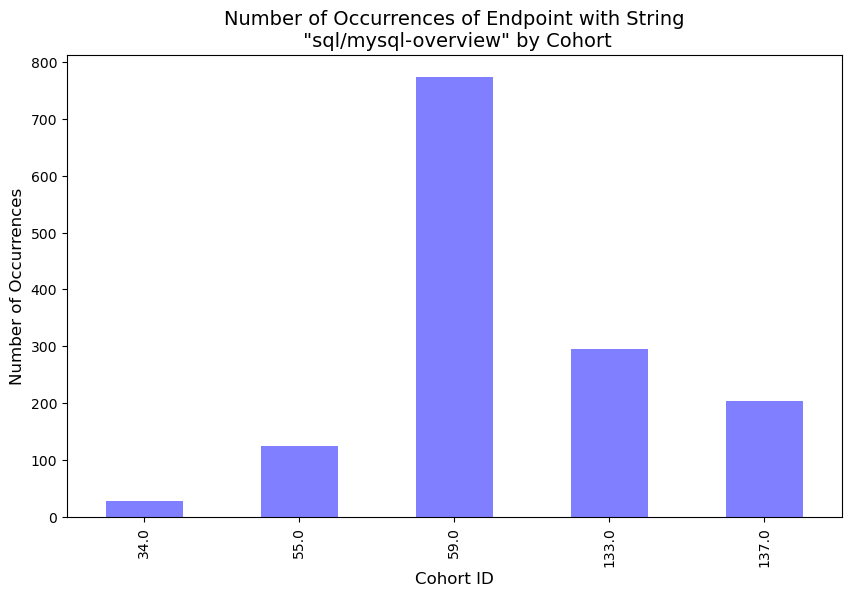

In [57]:
# group by cohort_id and count the number of occurrences of the string in endpoint column
counts = df3.groupby('cohort_id')['endpoint'].apply(lambda x: x.str.contains('sql/mysql-overview').sum())

# plot the counts as a bar chart
ax = counts.plot(kind='bar', figsize=(10, 6), color='blue', alpha=0.5)

# set the chart title, x-axis label, and y-axis label
ax.set_title('Number of Occurrences of Endpoint with String\n "sql/mysql-overview" by Cohort', fontsize=14)
ax.set_xlabel('Cohort ID', fontsize=12)
ax.set_ylabel('Number of Occurrences', fontsize=12)

# show the plot
plt.show()

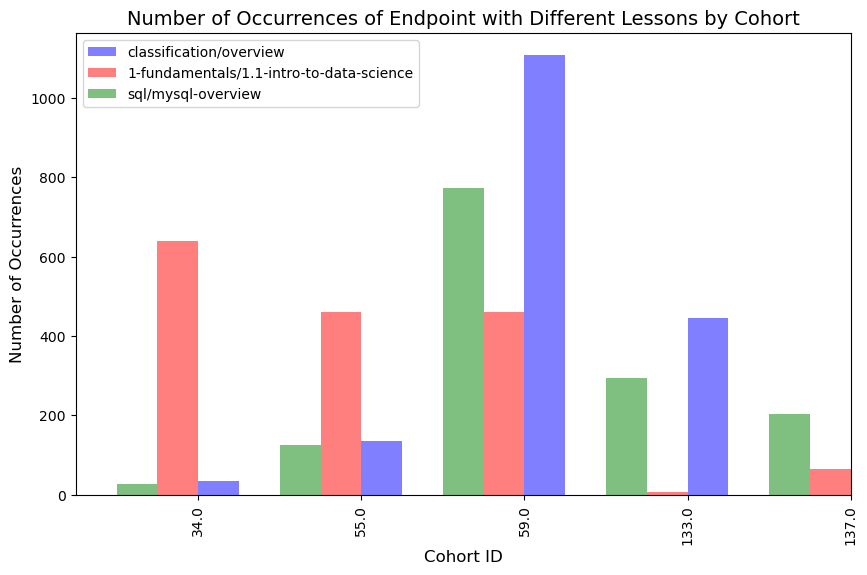

In [59]:
# graph all three lessons broken down by cohorts and compare side by side

# group by cohort_id and count the number of occurrences of the string in endpoint column for each string
counts1 = df3.groupby('cohort_id')['endpoint'].apply(lambda x: x.str.contains('classification/overview').sum())
counts2 = df3.groupby('cohort_id')['endpoint'].apply(lambda x: x.str.contains('1-fundamentals/1.1-intro-to-data-science').sum())
counts3 = df3.groupby('cohort_id')['endpoint'].apply(lambda x: x.str.contains('sql/mysql-overview').sum())

# create a figure and axes object
fig, ax = plt.subplots(figsize=(10, 6))

# plot each count as a bar chart with a different color
counts1.plot(kind='bar', ax=ax, color='blue', alpha=0.5, position=0, width=0.25)
counts2.plot(kind='bar', ax=ax, color='red', alpha=0.5, position=1, width=0.25)
counts3.plot(kind='bar', ax=ax, color='green', alpha=0.5, position=2, width=0.25)

# set the chart title, x-axis label, and y-axis label
ax.set_title('Number of Occurrences of Endpoint with Different Lessons by Cohort', fontsize=14)
ax.set_xlabel('Cohort ID', fontsize=12)
ax.set_ylabel('Number of Occurrences', fontsize=12)

# add a legend to the plot
ax.legend(['classification/overview', '1-fundamentals/1.1-intro-to-data-science', 'sql/mysql-overview'])

# show the plot
plt.show()

#### Takeaway
* Data Science 3.0's highest endpoint occurences is classification overview with over 1,700 hits, however, it may not be the most consistent in that it drops off in first and last cohort. The 'sql/mysql-overview' maintained over a 100 hits for four straight cohorts. 

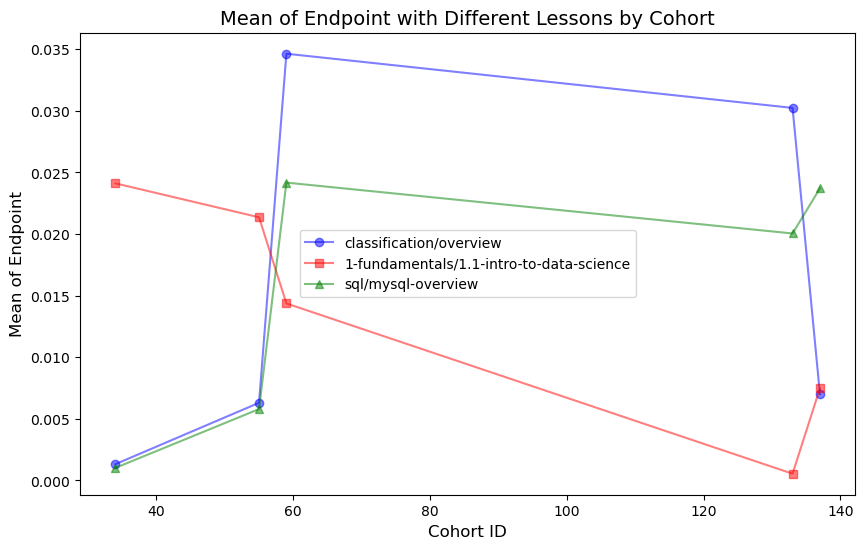

In [60]:
# graph by mean of lesson hits by cohort using a line plot

# group by cohort_id and calculate the mean of the endpoint column for each string
means1 = df3.groupby('cohort_id')['endpoint'].apply(lambda x: x.str.contains('classification/overview').mean())
means2 = df3.groupby('cohort_id')['endpoint'].apply(lambda x: x.str.contains('1-fundamentals/1.1-intro-to-data-science').mean())
means3 = df3.groupby('cohort_id')['endpoint'].apply(lambda x: x.str.contains('sql/mysql-overview').mean())

# create a figure and axes object
fig, ax = plt.subplots(figsize=(10, 6))

# plot each mean as a line chart with a different color
means1.plot(kind='line', ax=ax, color='blue', alpha=0.5, marker='o')
means2.plot(kind='line', ax=ax, color='red', alpha=0.5, marker='s')
means3.plot(kind='line', ax=ax, color='green', alpha=0.5, marker='^')

# set the chart title, x-axis label, and y-axis label
ax.set_title('Mean of Endpoint with Different Lessons by Cohort', fontsize=14)
ax.set_xlabel('Cohort ID', fontsize=12)
ax.set_ylabel('Mean of Endpoint', fontsize=12)

# add a legend to the plot
ax.legend(['classification/overview', '1-fundamentals/1.1-intro-to-data-science', 'sql/mysql-overview'])

# show the plot
plt.show()

<div class="alert alert-block alert-warning">

### Summarize
* WebDev 1.0's highest endpoint occurences is 'javascript i introduction', with 232 hits. The cohort's consistency never changed between lessons so we selected 'javascript i introduction' as most consistent.
* WebDev 2.0's highest endpoint occurences is 'javascript i introduction', with over 7,000 hits. It stayed consistent with over 140 hits across for 24 cohorts straight.
* Data Science 3.0's highest endpoint occurences is classification overview with over 1,700 hits, however, it may not be the most consistent in that it drops off in first and last cohort. The 'sql/mysql-overview' maintained over a 100 hits for four straight cohorts.

</div>

## Question 2: Is there a cohort that referred to a lesson significantly more than other cohorts seemed to gloss over?

In [41]:
# get count of hits for highest endpoint hits by cohort_id
df1.groupby('cohort_id')['endpoint'].apply(lambda x: x.str.contains('javascript-i/javascript-with-html').sum())

cohort_id
1.0     76
2.0      0
4.0      0
5.0      0
6.0      1
7.0     14
8.0      9
11.0     2
12.0     0
13.0     5
14.0    54
17.0    63
19.0     1
Name: endpoint, dtype: int64

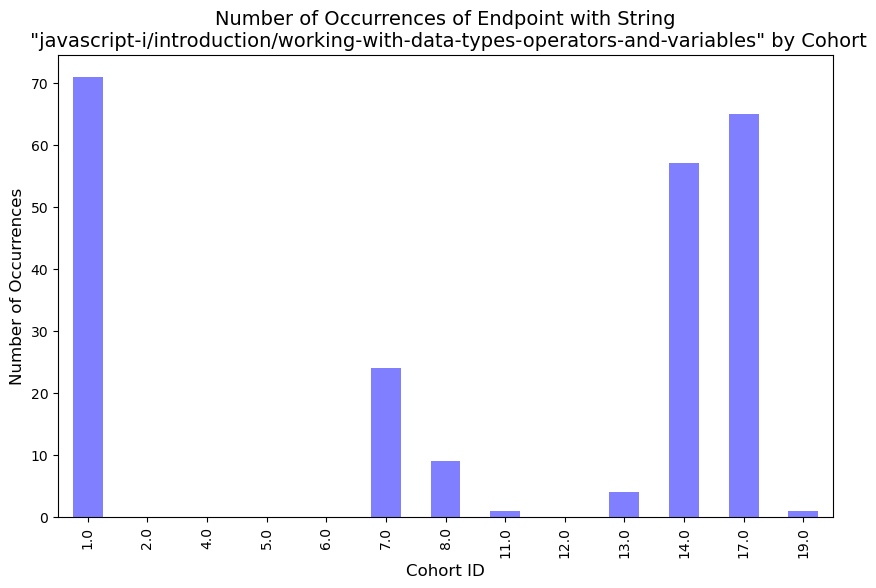

In [38]:
# selected highest hit endpoint to graph by cohort_id

# group by cohort_id and count the number of occurrences of the string in endpoint column
counts = df1.groupby('cohort_id')['endpoint'].apply(lambda x: x.str.contains('javascript-i/introduction/working-with-data-types-operators-and-variables').sum())

# plot the counts as a bar chart
ax = counts.plot(kind='bar', figsize=(10, 6), color='blue', alpha=0.5)

# set the chart title, x-axis label, and y-axis label
ax.set_title('Number of Occurrences of Endpoint with String\n "javascript-i/introduction/working-with-data-types-operators-and-variables" by Cohort', fontsize=14)
ax.set_xlabel('Cohort ID', fontsize=12)
ax.set_ylabel('Number of Occurrences', fontsize=12)

# show the plot
plt.show()

#### Takeaway
* For WebDev 1.0 cohort 1.0 had 73 occurences for 'javascript-i intro' while 10 other cohorts had between 0 and 14. 

In [47]:
# get count of hits of highest endpoint hits by cohort_id
df2.groupby('cohort_id')['endpoint'].apply(lambda x: x.str.contains('javascript-i/introduction/working-with-data-types-operators-and-variables').sum())

cohort_id
15.0       0
16.0       1
18.0      11
21.0      36
22.0     176
23.0     276
24.0     330
25.0     283
26.0     241
27.0     173
28.0     288
29.0     356
31.0     294
32.0     327
33.0     423
51.0     292
52.0     319
53.0     295
56.0     270
57.0     257
58.0     382
61.0     173
62.0     362
132.0    237
134.0    315
135.0    505
138.0    329
139.0    146
Name: endpoint, dtype: int64

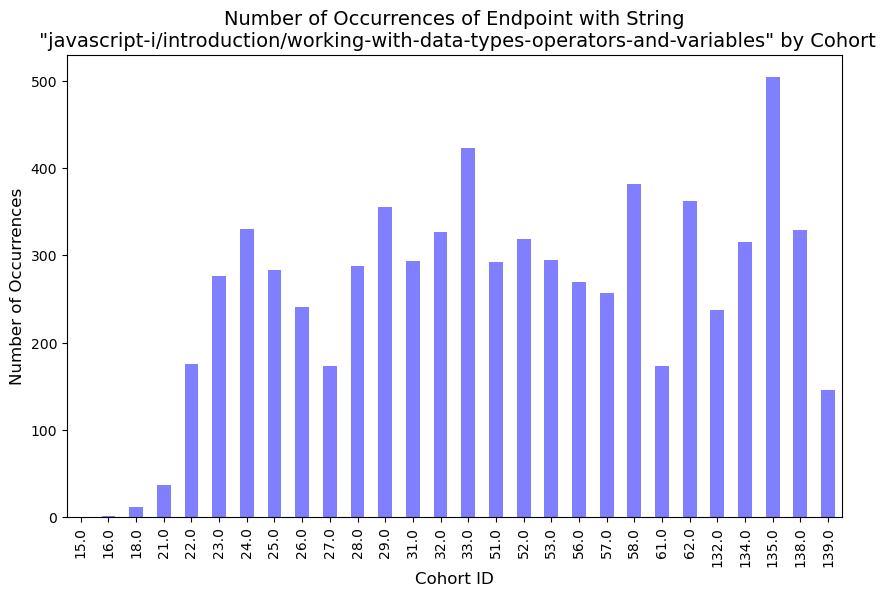

In [48]:
# group by cohort_id and count the number of occurrences of the string in endpoint column
counts = df2.groupby('cohort_id')['endpoint'].apply(lambda x: x.str.contains('javascript-i/introduction/working-with-data-types-operators-and-variables').sum())

# plot the counts as a bar chart
ax = counts.plot(kind='bar', figsize=(10, 6), color='blue', alpha=0.5)

# set the chart title, x-axis label, and y-axis label
ax.set_title('Number of Occurrences of Endpoint with String\n "javascript-i/introduction/working-with-data-types-operators-and-variables" by Cohort', fontsize=14)
ax.set_xlabel('Cohort ID', fontsize=12)
ax.set_ylabel('Number of Occurrences', fontsize=12)

# show the plot
plt.show()

#### Takeaway
* For WebDev 2.0 cohort 135.0 had 505 occurences for 'javascript-i intro' while 18 other cohorts had between 0 and 300. 

In [50]:
# get count of hits of highest endpoint hits by cohort_id
df3.groupby('cohort_id')['endpoint'].apply(lambda x: x.str.contains('classification/overview').sum())

cohort_id
34.0       35
55.0      136
59.0     1109
133.0     445
137.0      60
Name: endpoint, dtype: int64

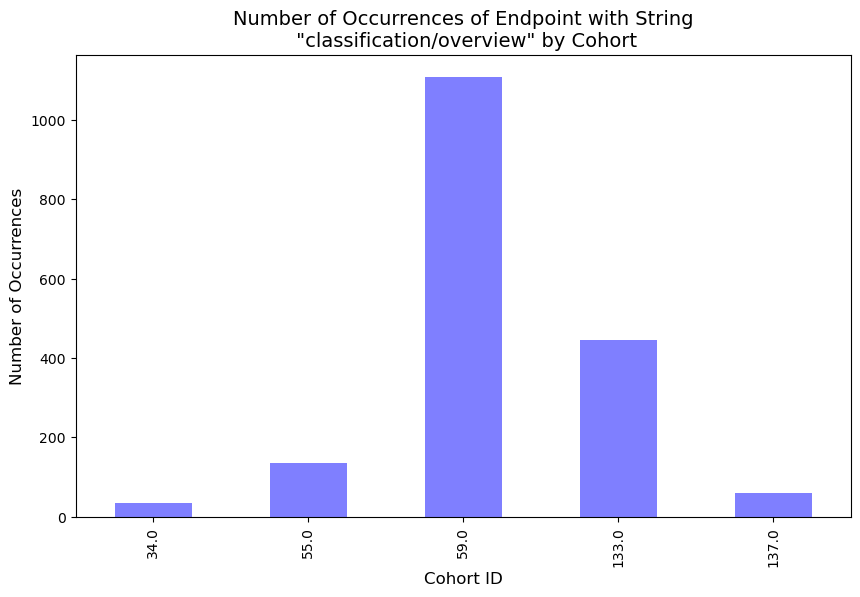

In [52]:
# group by cohort_id and count the number of occurrences of the string in endpoint column
counts = df3.groupby('cohort_id')['endpoint'].apply(lambda x: x.str.contains('classification/overview').sum())

# plot the counts as a bar chart
ax = counts.plot(kind='bar', figsize=(10, 6), color='blue', alpha=0.5)

# set the chart title, x-axis label, and y-axis label
ax.set_title('Number of Occurrences of Endpoint with String\n "classification/overview" by Cohort', fontsize=14)
ax.set_xlabel('Cohort ID', fontsize=12)
ax.set_ylabel('Number of Occurrences', fontsize=12)

# show the plot
plt.show()

#### Takeaway
* For Data Science 3.0 cohort 59.0 had 1109 occurences for 'classification-overview' while the 4 other cohorts had between 0 and 445. 

<div class="alert alert-block alert-warning">

### Summarize
* For WebDev 1.0 cohort 1.0 had 73 occurences for 'javascript-i intro' while 10 other cohorts had between 0 and 14.
* For WebDev 2.0 cohort 135.0 had 505 occurences for 'javascript-i intro' while 18 other cohorts had between 0 and 300. 
* For Data Science 3.0 cohort 59.0 had 1109 occurences for 'classification-overview' while the 4 other cohorts had between 0 and 445. 

</div>

## Question 5: Which lessons are least accessed?

In [67]:
# look at the lessons
df['endpoint'].value_counts().tail(75)

user/913                                                        1
8.7_Project                                                     1
content/mysql/clauses/order-by.html                             1
appendix/further-reading/html-css                               1
appendix/spring/authorization                                   1
                                                               ..
javascript/loops                                                1
content/control-structures-ii                                   1
javascript-ii/promisesdfghjkjhgfs                               1
app                                                             1
appendix/professional-development/post-interview-review-form    1
Name: endpoint, Length: 75, dtype: int64

<div class="alert alert-block alert-warning">

# summarize...

</div>